In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

zerg_data = read_csv('../Output/ZergFeb.csv', header=0, index_col=False)
display(zerg_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,532.0,480,30,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,420.0,960,60,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,352.8,1440,90,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,358.4,1920,120,Player 1 - soO (Zerg),...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81321,3455,Eternal Empire LE,eu,1610,Z,T,568.4,33600,2100,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,71,1
81322,3455,Eternal Empire LE,eu,1610,Z,T,590.8,34080,2130,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,68,1
81323,3455,Eternal Empire LE,eu,1610,Z,T,758.8,34560,2160,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,80,1
81324,3455,Eternal Empire LE,eu,1610,Z,T,476.0,35040,2190,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,2,79,1


In [2]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(zerg_data) if x not in no_normalize]

#Normalizing these columns
norm = zerg_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
zerg_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(zerg_data_normalized.head(5), zerg_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.111111,0.049020,0.000000,0.003451,0.000000,0.000000,0.003711,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,0.144158,0.120370,0.058824,0.000000,0.003796,0.164452,0.027397,0.005566,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.113809,0.129630,0.068627,0.024096,0.016563,0.182749,0.018265,0.011132,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
3,0.095599,0.148148,0.078431,0.024096,0.006211,0.188848,0.082192,0.014842,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,0.097117,0.148148,0.078431,0.024096,0.006556,0.201046,0.141553,0.014842,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
81321,0.154021,0.629630,0.901961,0.572289,0.093444,0.621869,0.182648,0.564007,0.430147,0.625062,...,0,0,0,0,1,0,0,0,1,0
81322,0.160091,0.629630,0.909314,0.572289,0.104141,0.634067,0.127854,0.579777,0.461397,0.636691,...,0,0,0,0,1,0,0,0,1,0
81323,0.205615,0.629630,0.928922,0.572289,0.090683,0.597473,0.091324,0.594620,0.498162,0.647195,...,0,0,0,0,1,0,0,0,1,0
81324,0.128983,0.620370,0.872549,0.572289,0.136577,0.579177,0.054795,0.584416,0.488971,0.662575,...,0,0,0,0,1,0,0,0,1,0
81325,0.000000,0.574074,0.970588,0.572289,0.111387,0.548682,0.063927,0.621521,0.580882,0.666327,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_normalized) if x not in no_X]

Y = zerg_data_normalized['win']
X_normalized = zerg_data_normalized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [5]:
X_train = zerg_data_normalized[0:num_train]
X_val = zerg_data_normalized[num_train:(num_train + num_val)]
X_test = zerg_data_normalized[(num_val + num_train):]

In [6]:
Y_train.shape

(52048,)

In [7]:
X_train.shape

(52048, 116)

In [8]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [9]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [10]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [11]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(X_normalized[:w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 115)
Inputs shape: (1, 15, 115)
labels shape: (1, 15, 1)


In [12]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

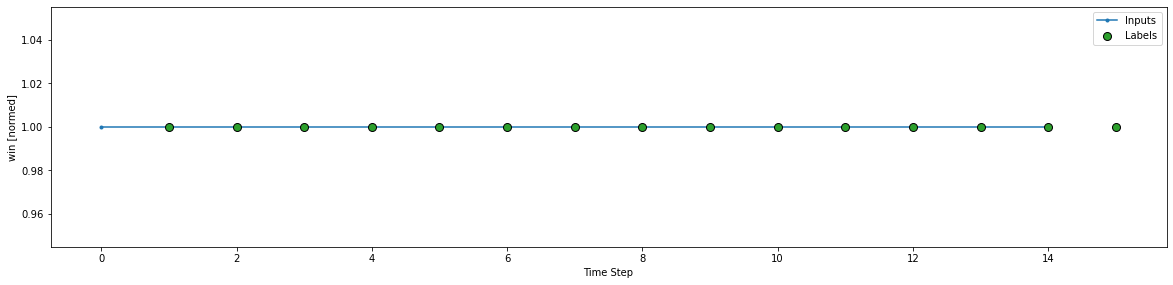

In [13]:
w1.example = example_inputs, example_labels
w1.plot()

In [14]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [15]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [17]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [18]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

In [19]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [20]:
val_performance = {}
performance = {}

history_linear = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
1627/1627 [=====================

Epoch 27/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0816 - binary_accuracy: 0.9830 - precision: 0.9832 - recall: 0.9832 - auc: 0.9894 - val_loss: 0.0849 - val_binary_accuracy: 0.9824 - val_precision: 0.9801 - val_recall: 0.9812 - val_auc: 0.9876
Epoch 28/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0816 - binary_accuracy: 0.9830 - precision: 0.9832 - recall: 0.9832 - auc: 0.9894 - val_loss: 0.0849 - val_binary_accuracy: 0.9824 - val_precision: 0.9801 - val_recall: 0.9812 - val_auc: 0.9875
Epoch 29/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0816 - binary_accuracy: 0.9830 - precision: 0.9832 - recall: 0.9832 - auc: 0.9894 - val_loss: 0.0849 - val_binary_accuracy: 0.9825 - val_precision: 0.9802 - val_recall: 0.9812 - val_auc: 0.9875
Epoch 30/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0815 - binary_accuracy: 0.9830 - precision: 0.9832 - recall: 0.9832 - auc: 0.9895 - val_loss: 0.08

Epoch 57/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0812 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9896 - val_loss: 0.0848 - val_binary_accuracy: 0.9828 - val_precision: 0.9810 - val_recall: 0.9812 - val_auc: 0.9877
Epoch 58/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0812 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9896 - val_loss: 0.0848 - val_binary_accuracy: 0.9828 - val_precision: 0.9810 - val_recall: 0.9812 - val_auc: 0.9876
Epoch 59/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0812 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9896 - val_loss: 0.0848 - val_binary_accuracy: 0.9828 - val_precision: 0.9810 - val_recall: 0.9812 - val_auc: 0.9876
Epoch 60/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0812 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9896 - val_loss: 0.08

Epoch 87/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0810 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9897 - val_loss: 0.0849 - val_binary_accuracy: 0.9828 - val_precision: 0.9810 - val_recall: 0.9812 - val_auc: 0.9875
Epoch 88/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0810 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9897 - val_loss: 0.0849 - val_binary_accuracy: 0.9828 - val_precision: 0.9810 - val_recall: 0.9812 - val_auc: 0.9875
Epoch 89/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0810 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9897 - val_loss: 0.0849 - val_binary_accuracy: 0.9828 - val_precision: 0.9810 - val_recall: 0.9812 - val_auc: 0.9875
Epoch 90/100
1627/1627 [==============================] - 3s 2ms/step - loss: 0.0810 - binary_accuracy: 0.9829 - precision: 0.9831 - recall: 0.9832 - auc: 0.9897 - val_loss: 0.08

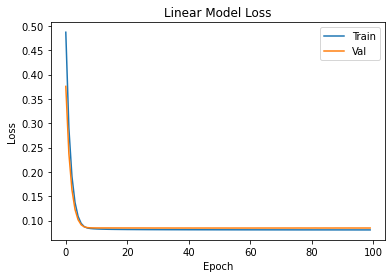

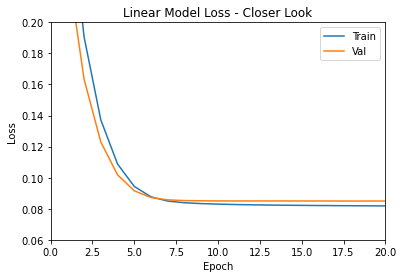

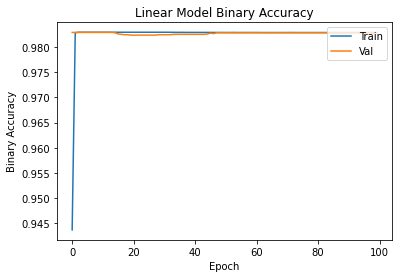

In [40]:
import matplotlib.pyplot as plt

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.06,0.2)
plt.xlim(0,20)
plt.show()

#Linear Model Binary Accuracy
plt.plot(history_linear.history['binary_accuracy'])
plt.plot(history_linear.history['val_binary_accuracy'])
plt.title('Linear Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


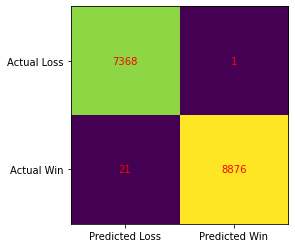

In [22]:
#Confusion matrix for Test set using Linear model 

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, linear.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

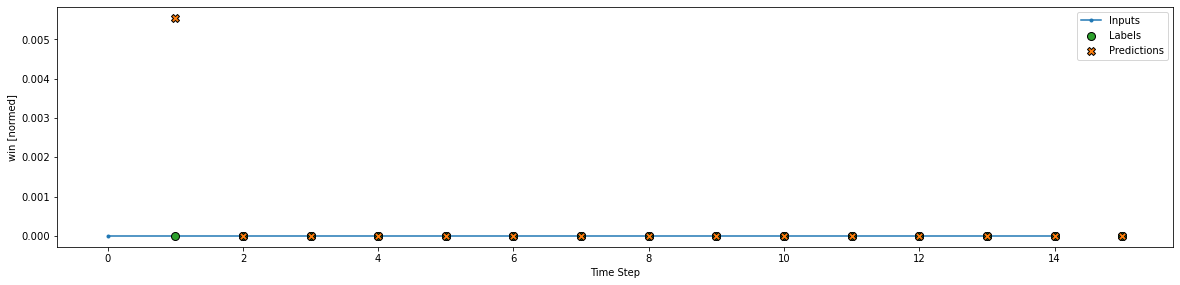

In [23]:
#Linear

wide_window.plot(linear)

In [24]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history_dense = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1627/1627 [==============================] - 4s 3ms/step - loss: 0.1652 - binary_accuracy: 0.9583 - precision_1: 0.9514 - recall_1: 0.9672 - auc_1: 0.9833 - val_loss: 0.0848 - val_binary_accuracy: 0.9822 - val_precision_1: 0.9796 - val_recall_1: 0.9814 - val_auc_1: 0.9864
Epoch 2/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0772 - binary_accuracy: 0.9829 - precision_1: 0.9830 - recall_1: 0.9833 - auc_1: 0.9895 - val_loss: 0.0752 - val_binary_accuracy: 0.9820 - val_precision_1: 0.9784 - val_recall_1: 0.9821 - val_auc_1: 0.9929
Epoch 3/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0645 - binary_accuracy: 0.9829 - precision_1: 0.9826 - recall_1: 0.9837 - auc_1: 0.9954 - val_loss: 0.0645 - val_binary_accuracy: 0.9822 - val_precision_1: 0.9784 - val_recall_1: 0.9826 - val_auc_1: 0.9961
Epoch 4/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0547 - binary_accuracy: 0.9829 - precision_1: 0.9828 - recall_1: 0

1627/1627 [==============================] - 4s 2ms/step - loss: 0.0301 - binary_accuracy: 0.9878 - precision_1: 0.9888 - recall_1: 0.9872 - auc_1: 0.9991 - val_loss: 0.0638 - val_binary_accuracy: 0.9774 - val_precision_1: 0.9769 - val_recall_1: 0.9733 - val_auc_1: 0.9961
Epoch 30/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0295 - binary_accuracy: 0.9881 - precision_1: 0.9890 - recall_1: 0.9876 - auc_1: 0.9991 - val_loss: 0.0648 - val_binary_accuracy: 0.9772 - val_precision_1: 0.9719 - val_recall_1: 0.9782 - val_auc_1: 0.9962
Epoch 31/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0288 - binary_accuracy: 0.9884 - precision_1: 0.9893 - recall_1: 0.9878 - auc_1: 0.9992 - val_loss: 0.0659 - val_binary_accuracy: 0.9779 - val_precision_1: 0.9743 - val_recall_1: 0.9771 - val_auc_1: 0.9958
Epoch 32/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0281 - binary_accuracy: 0.9887 - precision_1: 0.9895 - recall_1: 0.9882 - a

1627/1627 [==============================] - 4s 2ms/step - loss: 0.0111 - binary_accuracy: 0.9960 - precision_1: 0.9960 - recall_1: 0.9962 - auc_1: 0.9999 - val_loss: 0.1459 - val_binary_accuracy: 0.9713 - val_precision_1: 0.9698 - val_recall_1: 0.9670 - val_auc_1: 0.9895
Epoch 58/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0106 - binary_accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9964 - auc_1: 0.9999 - val_loss: 0.1500 - val_binary_accuracy: 0.9718 - val_precision_1: 0.9711 - val_recall_1: 0.9668 - val_auc_1: 0.9893
Epoch 59/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0101 - binary_accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9965 - auc_1: 0.9999 - val_loss: 0.1545 - val_binary_accuracy: 0.9711 - val_precision_1: 0.9664 - val_recall_1: 0.9700 - val_auc_1: 0.9882
Epoch 60/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0097 - binary_accuracy: 0.9966 - precision_1: 0.9965 - recall_1: 0.9968 - a

Epoch 86/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0036 - binary_accuracy: 0.9987 - precision_1: 0.9987 - recall_1: 0.9988 - auc_1: 1.0000 - val_loss: 0.2755 - val_binary_accuracy: 0.9644 - val_precision_1: 0.9640 - val_recall_1: 0.9573 - val_auc_1: 0.9807
Epoch 87/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0035 - binary_accuracy: 0.9987 - precision_1: 0.9987 - recall_1: 0.9988 - auc_1: 1.0000 - val_loss: 0.2703 - val_binary_accuracy: 0.9686 - val_precision_1: 0.9642 - val_recall_1: 0.9668 - val_auc_1: 0.9819
Epoch 88/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0033 - binary_accuracy: 0.9989 - precision_1: 0.9989 - recall_1: 0.9989 - auc_1: 1.0000 - val_loss: 0.2776 - val_binary_accuracy: 0.9658 - val_precision_1: 0.9632 - val_recall_1: 0.9614 - val_auc_1: 0.9813
Epoch 89/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0033 - binary_accuracy: 0.9988 - precision_1: 0.9988 - recall_

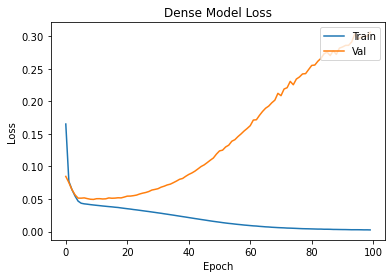

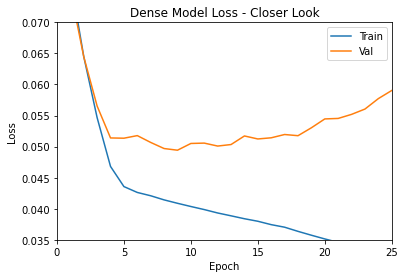

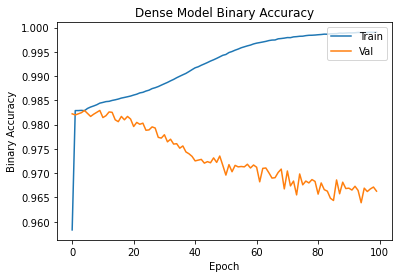

In [37]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.035,0.07)
plt.xlim(0,25)
plt.show()

#Dense Model Binary Accuracy
plt.plot(history_dense.history['binary_accuracy'])
plt.plot(history_dense.history['val_binary_accuracy'])
plt.title('Dense Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

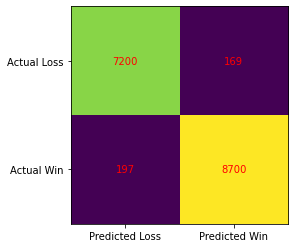

In [26]:
#Confusion matrix for Test set using Dense NN

cm = confusion_matrix(Y_test, dense.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

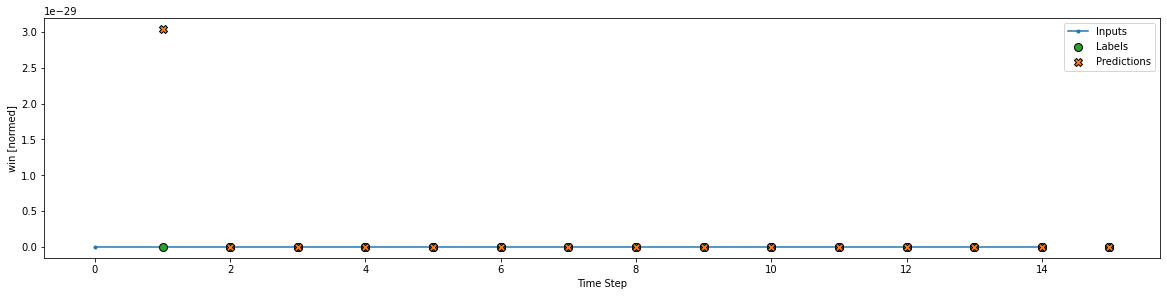

In [27]:
#Dense

wide_window.plot(dense)

In [28]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [29]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 15, 116)
Output shape: (32, 15, 1)


In [30]:
history_lstm = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.1297 - binary_accuracy: 0.9682 - precision_2: 0.9655 - recall_2: 0.9720 - auc_2: 0.9880 - val_loss: 0.0771 - val_binary_accuracy: 0.9823 - val_precision_2: 0.9800 - val_recall_2: 0.9811 - val_auc_2: 0.9931
Epoch 2/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0658 - binary_accuracy: 0.9830 - precision_2: 0.9832 - recall_2: 0.9833 - auc_2: 0.9958 - val_loss: 0.0696 - val_binary_accuracy: 0.9816 - val_precision_2: 0.9801 - val_recall_2: 0.9795 - val_auc_2: 0.9957
Epoch 3/100
1627/1627 [==============================] - 7s 4ms/step - loss: 0.0544 - binary_accuracy: 0.9834 - precision_2: 0.9832 - recall_2: 0.9841 - auc_2: 0.9976 - val_loss: 0.0629 - val_binary_accuracy: 0.9810 - val_precision_2: 0.9777 - val_recall_2: 0.9805 - val_auc_2: 0.9965
Epoch 4/100
1627/1627 [==============================] - 7s 4ms/step - loss: 0.0450 - binary_accuracy: 0.9846 - precision_2: 0.9844 - recall_2: 0

Epoch 30/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0075 - binary_accuracy: 0.9975 - precision_2: 0.9976 - recall_2: 0.9974 - auc_2: 0.9999 - val_loss: 0.1727 - val_binary_accuracy: 0.9678 - val_precision_2: 0.9624 - val_recall_2: 0.9669 - val_auc_2: 0.9860
Epoch 31/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0072 - binary_accuracy: 0.9976 - precision_2: 0.9977 - recall_2: 0.9976 - auc_2: 0.9999 - val_loss: 0.1861 - val_binary_accuracy: 0.9650 - val_precision_2: 0.9621 - val_recall_2: 0.9609 - val_auc_2: 0.9845
Epoch 32/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0070 - binary_accuracy: 0.9977 - precision_2: 0.9978 - recall_2: 0.9976 - auc_2: 0.9999 - val_loss: 0.1881 - val_binary_accuracy: 0.9651 - val_precision_2: 0.9578 - val_recall_2: 0.9657 - val_auc_2: 0.9849
Epoch 33/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0068 - binary_accuracy: 0.9977 - precision_2: 0.9978 - recall_

Epoch 59/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0038 - binary_accuracy: 0.9987 - precision_2: 0.9988 - recall_2: 0.9986 - auc_2: 0.9999 - val_loss: 0.2501 - val_binary_accuracy: 0.9652 - val_precision_2: 0.9666 - val_recall_2: 0.9565 - val_auc_2: 0.9807
Epoch 60/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0039 - binary_accuracy: 0.9987 - precision_2: 0.9988 - recall_2: 0.9986 - auc_2: 0.9999 - val_loss: 0.2539 - val_binary_accuracy: 0.9655 - val_precision_2: 0.9655 - val_recall_2: 0.9583 - val_auc_2: 0.9807
Epoch 61/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0038 - binary_accuracy: 0.9987 - precision_2: 0.9988 - recall_2: 0.9987 - auc_2: 0.9999 - val_loss: 0.2568 - val_binary_accuracy: 0.9640 - val_precision_2: 0.9670 - val_recall_2: 0.9534 - val_auc_2: 0.9797
Epoch 62/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0037 - binary_accuracy: 0.9987 - precision_2: 0.9988 - recall_

Epoch 88/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0027 - binary_accuracy: 0.9991 - precision_2: 0.9991 - recall_2: 0.9991 - auc_2: 1.0000 - val_loss: 0.2844 - val_binary_accuracy: 0.9653 - val_precision_2: 0.9651 - val_recall_2: 0.9583 - val_auc_2: 0.9797
Epoch 89/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0025 - binary_accuracy: 0.9992 - precision_2: 0.9992 - recall_2: 0.9991 - auc_2: 1.0000 - val_loss: 0.3005 - val_binary_accuracy: 0.9647 - val_precision_2: 0.9638 - val_recall_2: 0.9584 - val_auc_2: 0.9786
Epoch 90/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0026 - binary_accuracy: 0.9991 - precision_2: 0.9992 - recall_2: 0.9991 - auc_2: 1.0000 - val_loss: 0.2924 - val_binary_accuracy: 0.9651 - val_precision_2: 0.9678 - val_recall_2: 0.9551 - val_auc_2: 0.9787
Epoch 91/100
1627/1627 [==============================] - 7s 5ms/step - loss: 0.0025 - binary_accuracy: 0.9992 - precision_2: 0.9992 - recall_

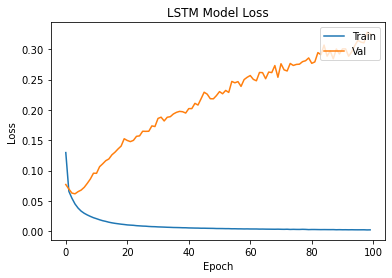

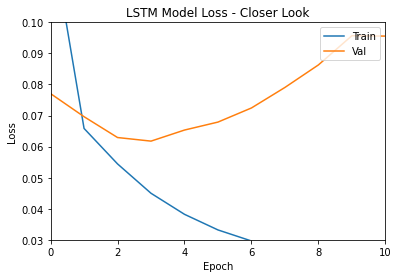

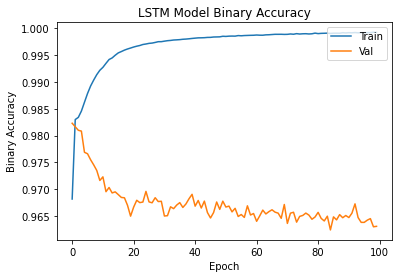

In [35]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.03,0.1)
plt.xlim(0,10)
plt.show()

#LSTM Model Binary Accuracy
plt.plot(history_lstm.history['binary_accuracy'])
plt.plot(history_lstm.history['val_binary_accuracy'])
plt.title('LSTM Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

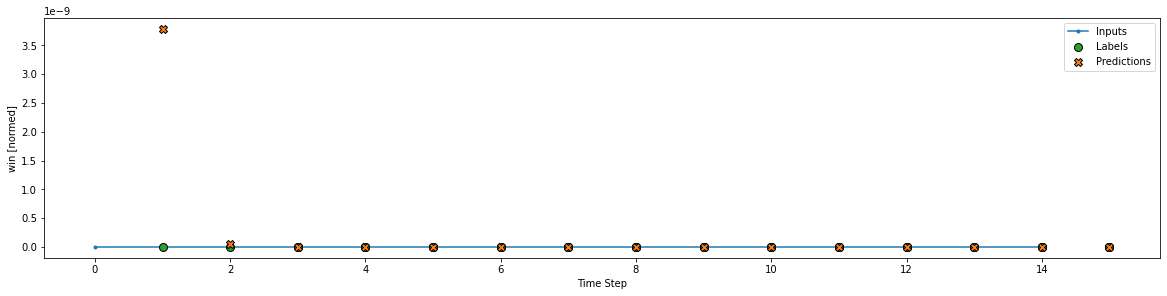

In [32]:
#LSTM

wide_window.plot(lstm_model)

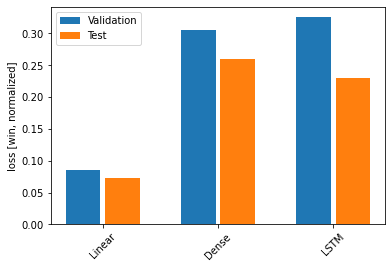

In [33]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, val_loss, width, label='Validation')
plt.bar(x + 0.17, test_loss, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()